In [2]:
import math
import matplotlib.pyplot as plt

# Estrutura das Células
Elas são compostas por 3 modulações, 16-QAM, 64-QAM e 256-QAM.

Primeiramente foi calculado e analisado o SINR nas 3 modulações, utilizando:

- SCS (Espaçamento entre sub-portadoras) = 15 kHz
- Banda da portadora = 180 kHz

Com isso ainda vai ser analisado a banda utilizada baseada no número de RB e de usuários desejados.

In [31]:
#SCS = 15 kHz
#Banda = 180 kHz

def r_sinr_16_qam(sinr):
    r = 47613.1 / (0.0926275 + math.exp(-0.295838 * sinr)) #bits/s

    return r / (10**6) #Mbits/s

def r_sinr_64_qam(sinr):
    r = 26405.8 / (0.0220186 + math.exp(-0.24491 * sinr)) #bits/s

    return r / (10**6) #Mbits/s

def r_sinr_256_qam(sinr):
    r = 26407.1 / (0.0178868 + math.exp(-0.198952 * sinr)) #bits/s

    return r / (10**6) #Mbits/s

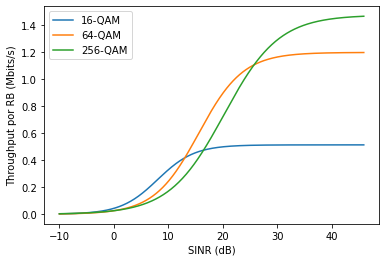

In [76]:
eixo_sinr = []
eixo_r_16, eixo_r_64, eixo_r_256 = [], [], []

for i in range(-100, 460, 1):

    eixo_sinr.append(i/10)

    eixo_r_16.append(r_sinr_16_qam(i/10))
    eixo_r_64.append(r_sinr_64_qam(i/10))
    eixo_r_256.append(r_sinr_256_qam(i/10))

plt.plot(eixo_sinr, eixo_r_16, label = "16-QAM")
plt.plot(eixo_sinr, eixo_r_64, label = "64-QAM")
plt.plot(eixo_sinr, eixo_r_256, label = "256-QAM")

#plt.title('Variando o fc: hb = 50m, R = 2Km')
plt.xlabel('SINR (dB)')
plt.ylabel('Throughput por RB (Mbits/s)')

plt.legend()

plt.show()

In [86]:
print(f'SINR para 16-QAM: 5,5dB')
print(f'Gerando um throughput mínimo de {round(r_sinr_16_qam(5.5), 3)} Mbits por RB\n')
# print(r_sinr_16_qam(5.5))

print(f'SINR para 64-QAM: 13dB')
print(f'Gerando um throughput mínimo de {round(r_sinr_64_qam(13), 3)} Mbits por RB\n')
# print(r_sinr_16_qam(13))
# print(r_sinr_64_qam(13))

print(f'SINR para 256-QAM: 25,7dB')
print(f'Gerando um throughput mínimo de {round(r_sinr_256_qam(25.7), 3)} Mbits por RB\n')
# print(r_sinr_16_qam(25.7))
# print(r_sinr_64_qam(25.7))

SINR para 16-QAM: 5,5dB
Gerando um throughput mínimo de 0.165 Mbits por RB

SINR para 64-QAM: 13dB
Gerando um throughput mínimo de 0.416 Mbits por RB

SINR para 256-QAM: 25,7dB
Gerando um throughput mínimo de 1.105 Mbits por RB



# Ambiente

Foi selecionado o campus Darcy Ribeiro da UnB que tem aproximadamente 3950569 m² (3,95 km²).

Onde tem com os estudantes, docentes e funcionários, 54034 possíveis usuários.

Mas considerando um fluxo de 20% desse total, sendo 10807 possíveis usuários simultaneos.


Foi utilizado o modelo de Okamura Hata e considerado a UnB como uma Área Suburbana

Com isso foi escolhido uma banda de 50 MHz ficando com um número de 270 Resource Blocks

In [48]:
def okamura(fc, hb, r):

    a = 69.55 + 26.16*math.log10(fc) - 13.82*math.log10(hb)

    b = 44.9 - 6.55*math.log10(hb)

    c = 5.4 + 2*(math.log10(fc/28))**2

    d = 40.94 + 4.78*(math.log10(fc))**2 - 18.33*math.log10(fc)


    L_urbana = a + b*math.log10(r)
    L_suburbana = a + b*math.log10(r) -c
    L_aberta = a + b*math.log10(r) -d

    return L_urbana, L_suburbana, L_aberta

Utilizando o FR1 de utilização do espectro, (450 MHz - 6 GHz) com 50 MHz de largura de banda. Foi utilizado a faixa de 450 - 500 MHz.

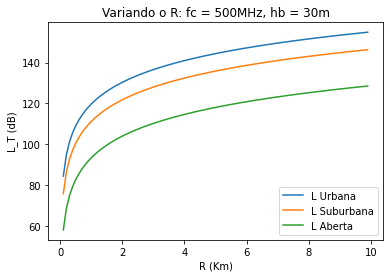

In [89]:
fc = 500 #MHz
hb = 30  #m

l_r1, l_r2, l_r3 = [], [], []
eixo_r = []

for i in range(1, 100, 1):
    l1, l2, l3 = okamura(fc, hb, i/10)

    l_r1.append(l1)
    l_r2.append(l2)
    l_r3.append(l3)
    eixo_r.append(i/10)

plt.plot(eixo_r, l_r1, label = "L Urbana")
plt.plot(eixo_r, l_r2, label = "L Suburbana")
plt.plot(eixo_r, l_r3, label = "L Aberta")

plt.title('Variando o R: fc = 500MHz, hb = 30m')
plt.xlabel('R (Km)')
plt.ylabel('L_T (dB)')

plt.legend()

plt.show()


# Limitando a perda de percurso em 120 dB

SINR mínimo de cada modulação e com a utilização do Okamura Hata para a perda de propagação, foi limitada a perda de percurso em 120 dB, ficando:

16-QAM
- SINR = 5,5 dB
- L_t = 114,5 dB

64-QAM
- SINR = 13 dB
- L_t = 107 dB

256-QAM
- SINR = 25,7 dB
- L_t = 94,3 dB

Agora calculando o raio das células:

In [52]:
def raio_celula_M_qam(sinr):
    r = 0
    a = 0

    for i in range(1, 100, 1):
        l1, l2, l3 = okamura(fc, hb, i/10)
        
        if l2 > (120 - sinr) and a == 0:
            r = i/10
            a = 1
    
    return r

In [67]:
r_16 = raio_celula_M_qam(5.5)
r_64 = raio_celula_M_qam(13)
r_256 = raio_celula_M_qam(25.7)

print(f'Raio do 16-QAM: {r_16} km\n')
print(f'Raio do 64-QAM: {r_64} km\n')
print(f'Raio do 256-QAM: {r_256} km\n')

Raio do 16-QAM: 1.3 km

Raio do 64-QAM: 0.8 km

Raio do 256-QAM: 0.4 km



In [87]:
def area_celula(r):
    
    a = 3 / 2 * math.sqrt(3) * (r*0.95)**2

    return a

In [88]:
a_16 = area_celula(r_16)
a_64 = area_celula(r_64)
a_256 = area_celula(r_256)

print(f'Área do 16-QAM: {round(a_16, 2)} km²\n')
print(f'Área do 64-QAM: {round(a_64, 2)} km²\n')
print(f'Área do 256-QAM: {round(a_256, 2)} km²\n')

Área do 16-QAM: 3.96 km²

Área do 64-QAM: 1.5 km²

Área do 256-QAM: 0.38 km²



# Conclusões

Dessa forma uma única célula preencheria toda a área da UnB caso essa área fosse centralizada. Porém além do problema da área não ser uniforme, mas considerando esse caso como simplicação. Também tem o problema que o throughput por RB não é necessário para a quantidade de usuários e de uso que essa rede será aplicada.

Assim, é possível considerar um SINR maior para conseguir um maior throughput por RB e diminuindo o raio da célua a perda total de percurso pode continuar a mesma.